# Kepler Data

## The Data

SIMBAD info: http://simbad.u-strasbg.fr/simbad/sim-id?Ident=KIC7198959

Lightcurve data from: https://archive.stsci.edu/kepler/publiclightcurves.html

In [1]:
# !curl -O http://archive.stsci.edu/pub/kepler/lightcurves/0071/007198959/kplr007198959-2009259160929_llc.fits

In [2]:
from astropy.io import fits
hdulist = fits.open('kplr007198959-2009259160929_llc.fits')
hdulist.info()

Filename: kplr007198959-2009259160929_llc.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      58   ()              
1    LIGHTCURVE  BinTableHDU    155   4354R x 20C   [D, E, J, E, E, E, E, E, E, J, D, E, D, E, D, E, D, E, E, E]   
2    APERTURE    ImageHDU        48   (12, 41)     int32   


In [3]:
hdulist[1].header

XTENSION= 'BINTABLE'           / marks the beginning of a new HDU               
BITPIX  =                    8 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                  100 / length of first array dimension                
NAXIS2  =                 4354 / length of second array dimension               
PCOUNT  =                    0 / group parameter count (not used)               
GCOUNT  =                    1 / group count (not used)                         
TFIELDS =                   20 / number of table fields                         
TTYPE1  = 'TIME    '           / column title: data time stamps                 
TFORM1  = 'D       '           / column format: 64-bit floating point           
TUNIT1  = 'BJD - 2454833'      / column units: barycenter corrected JD          
TDISP1  = 'D14.7   '           / column display format                          
TTYPE2  = 'TIMECORR'        

In [4]:
from astropy.table import Table
data = Table(hdulist[1].data)
data

TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,SAP_QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
float64,float32,int32,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
169.520244707,0.00276929,2965,1.04089e+07,80.6514,17445.8,6.81535,nan,nan,256,nan,nan,nan,nan,658.98490534,5.95852e-06,48.3103679836,6.3673e-05,-0.00062082,-0.0417439
169.540678885,0.00276986,2966,1.02251e+07,79.9479,17458.6,6.81904,nan,nan,256,nan,nan,nan,nan,658.984756055,6.02055e-06,48.3645953434,6.32755e-05,-0.000859906,-0.0414842
169.561113062,0.00277044,2967,1.00993e+07,79.4513,17447.1,6.81976,nan,nan,256,nan,nan,nan,nan,658.984589033,6.06324e-06,48.3997750666,6.29868e-05,-0.00104417,-0.0411753
169.581547239,0.00277102,2968,1.01336e+07,79.5974,17440.8,6.83005,nan,nan,8576,nan,nan,nan,nan,658.984422904,6.04838e-06,48.390495693,6.31236e-05,-0.00107995,-0.0406672
169.601981415,0.0027716,2969,1.02778e+07,80.1858,17444.1,6.82776,nan,nan,393600,nan,nan,nan,nan,658.984122755,5.99424e-06,48.3358836774,6.35298e-05,-0.00127112,-0.0405857
169.622415492,0.00277217,2970,1.02574e+07,80.072,17459.8,6.82085,nan,nan,256,nan,nan,nan,nan,658.984584229,5.99411e-06,48.3514164486,6.3458e-05,-0.00144995,-0.0403933
169.642849768,0.00277275,2971,9.98968e+06,79.0959,17483.7,6.82168,nan,nan,384,nan,nan,nan,nan,658.984344926,6.09163e-06,48.4532447707,6.3e-05,-0.00170547,-0.0402648
169.663283944,0.00277332,2972,9.77098e+06,78.2334,17483.0,6.82184,nan,nan,384,nan,nan,nan,nan,658.98438983,6.17017e-06,48.4774463806,6.24124e-05,-0.00160952,-0.0400706
169.68371802,0.0027739,2973,1.00747e+07,79.3498,17492.0,6.82596,nan,nan,8576,nan,nan,nan,nan,658.984164904,6.05106e-06,48.4005135707,6.30872e-05,-0.00186426,-0.0400735


In [5]:
df = data.to_pandas()[['TIME', 'SAP_FLUX', 'SAP_FLUX_ERR']]
df.shape

(4354, 3)

In [6]:
df = df.dropna()
df.shape

(4083, 3)

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from astropy.stats import LombScargle

plt.style.use('seaborn-whitegrid')

## Data and Window

In [8]:
from astropy.stats import LombScargle

In [9]:
ls = LombScargle(df['TIME'], 1, center_data=False, fit_mean=False)
freqW, powerW = ls.autopower(minimum_frequency=0,
                             maximum_frequency=200)

In [10]:
# Find the maximum near 2 hours
f, p = ls.autopower(minimum_frequency=1.95*24,
                    maximum_frequency=2.05*24,
                    samples_per_peak=100)
f_ny = f[np.argmax(p)]

In [11]:
t_sorted = np.sort(df['TIME'])
p_ny = 24 * 60 * 60 / f_ny
delta_t = (t_sorted[1:] - t_sorted[:-1]) * 24 * 60 * 60

In [12]:
ls = LombScargle(df['TIME'], df['SAP_FLUX'], df['SAP_FLUX_ERR'])
freq, power = ls.autopower(minimum_frequency=0,
                           maximum_frequency=200)

fmax = freq[np.argmax(power)] / 24

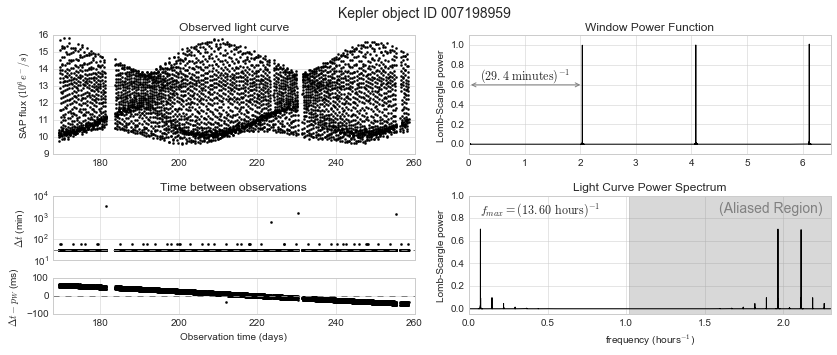

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(12, 5))

fig.suptitle('Kepler object ID 007198959', size=14)
fig.subplots_adjust(hspace=0.35, wspace=0.15, left=0.07, right=0.97)

# upper left
ax[0, 0].plot(df['TIME'], df['SAP_FLUX'] / 1E6, 'ok', markersize=2, rasterized=True)
ax[0, 0].set(ylabel='SAP flux ($10^6 e^-/s$)',
             title='Observed light curve',
             xlim=(168, 260))

# bottom left
left, bottom, width, height = ax[1, 0].get_position().bounds
ax[1, 0].set_position([left, bottom + 0.15, width, height-0.15])
inset = fig.add_axes([left, bottom, width, 0.1])

ax[1, 0].plot(t_sorted[:-1], delta_t / 60, 'ok', markersize=2, rasterized=True)
ax[1, 0].axhline(p_ny / 60, color='gray', linestyle='--')
ax[1, 0].set(xlim=ax[0, 0].get_xlim(),
             ylim=(10, 10000),
             yscale='log',
             ylabel='$\Delta t$ (min)',
             title='Time between observations')
ax[1, 0].xaxis.set_major_formatter(plt.NullFormatter())

inset.plot(t_sorted[:-1], 1000 * (delta_t - p_ny), 'ok', markersize=2, rasterized=True)
inset.axhline(0, color='gray', linestyle='--')
inset.set(xlim=ax[0, 0].get_xlim(),
          ylim=(-100, 100),
          xlabel='Observation time (days)',
          ylabel='$\Delta t - p_{W}$ (ms)')
inset.yaxis.set_major_locator(plt.MaxNLocator(3));

# Upper right
ax[0, 1].plot(freqW / 24, powerW, '-k', rasterized=True);
ax[0, 1].set(xlim=(0, 6.5),
             ylim=(-0.1, 1.1),
             ylabel='Lomb-Scargle power',
             title='Window Power Function');
ax[0, 1].annotate('', (0, 0.6), (f_ny / 24, 0.6),
                  arrowprops=dict(arrowstyle='<->', color='gray'));
ax[0, 1].text(f_ny / 48, 0.6, r'$({0:.1f}\ {{\rm minutes}})^{{-1}}$'.format(24 * 60 / f_ny),
              size=12, ha='center', va='bottom');

# Lower right
ax[1, 1].plot(freq / 24, power, '-k', rasterized=True)
ax[1, 1].fill_between([0.5 * f_ny / 24, 1.5 * f_ny / 24], -0.05, 1,
                      color='gray', alpha=0.3)
ax[1, 1].text(2.25, 0.95, r"(Aliased Region)", size=14, color='gray', ha='right', va='top')
ax[1, 1].text(fmax, 0.85, r"$f_{{max}}=({0:.2f}\ {{\rm hours}})^{{-1}}$".format(1 / fmax),
              size=12)
ax[1, 1].set(xlim=(0, 2.3),
             ylim=(-0.05, 1.0),
             xlabel='frequency (hours$^{-1}$)',
             ylabel='Lomb-Scargle power',
             title='Light Curve Power Spectrum');

fig.savefig('fig16_Kepler_data.pdf')